## This is a Jupyter notebook to set up and run a nudged elastic band (NEB) calculation using the MACE-MP-0 interatomic potential and the Atomic Simulation Environment (ASE).

Steps 1-3 of creating an input supercell structure are covered in the notebook mace_ase_optimise_fepo4.ipynb.

Sections that require user input for a specific system are shown as ################## User input ################# blocks.

### References:

#### ASE:
Paper: Larsen, A. H., Mortensen, J. J., Blomqvist, J., Castelli, I. E., Christensen, R., Dułak, M., ... & Jacobsen, K. W. (2017). The atomic simulation environment—a Python library for working with atoms. Journal of Physics: Condensed Matter, 29(27), 273002.

https://wiki.fysik.dtu.dk/ase/ase/io/io.html

https://wiki.fysik.dtu.dk/ase/ase/neb.html

https://wiki.fysik.dtu.dk/ase/tutorials/neb/diffusion.html

#### MACE:

Code: https://github.com/ACEsuit/mace-mp?tab=readme-ov-file

Paper: Batatia, I., Benner, P., Chiang, Y., Elena, A.M., Kovács, D.P., Riebesell, J., Advincula, X.R., Asta, M., Baldwin, W.J., Bernstein, N. and Bhowmik, A., 2023. A foundation model for atomistic materials chemistry. arXiv preprint arXiv:2401.00096.

#### NEB:

Henkelman, G., Uberuaga, B.P. and Jónsson, H., 2000. A climbing image nudged elastic band method for finding saddle points and minimum energy paths. The Journal of chemical physics, 113(22), pp.9901-9904.

Henkelman, G. and Jónsson, H., 2000. Improved tangent estimate in the nudged elastic band method for finding minimum energy paths and saddle points. The Journal of chemical physics, 113(22), pp.9978-9985.

https://theory.cm.utexas.edu/vtsttools/neb.html

## Step 0: Import some modules from ASE and MACE

In [1]:
import ase
from ase.optimize import LBFGS
from ase.io import read, write
from ase.filters import FrechetCellFilter
from ase.mep import NEB, NEBTools
from ase.build import make_supercell
from ase.io.trajectory import Trajectory
from ase import Atoms
from ase.constraints import FixAtoms
from mace.calculators import mace_mp
from ase.visualize import view

import matplotlib.pyplot as plt

Read in the 1x2x2 supercell structure of FePO4 that we created previously.

In [2]:
fully_occupied_super=read('supercell.cif',format='cif')
view(fully_occupied_super) 

<Popen: returncode: None args: ['/Library/Frameworks/Python.framework/Versio...>

## Step 4: Create two end member minima structures

In this step, we identify two neighbouring octaehdral Li positions in the FePO4 supercell (atom_pos_1 and atom_pos_2). The positions of the Li atoms are specified in fractional coordinates. 

In [3]:
################## User input #################
insert_atom_type='Li'
atom_pos_1=[0.5, 0.5,0.75] 
atom_pos_2=[0.5, 0.75,0.75]
################## User input #################

The Li are added in atom_pos_1 and atom_pos_2  to create two new supercells, min_cell_1 and min_cell_2. Once we have added a Li to the end of the file ([-1]) in each case, we optimise the atomic positions in the two new supercells. 

In [4]:
min_cell_1=fully_occupied_super.copy()
min_cell_1.append(insert_atom_type)
min_cell_1[-1].scaled_position=atom_pos_1
min_cell_1.calc=mace_mp(default_dtype="float32") #use float64 for higher precision

bfgs=LBFGS(min_cell_1)
traj = Trajectory('min_cell_1_opt.traj', 'w', min_cell_1)
bfgs.attach(traj)
bfgs.run(fmax=0.01)
write('pos_1.cif',min_cell_1,format='cif')
view(min_cell_1, viewer='x3d')

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 00:06:22     -684.478516        1.955441
LBFGS:    1 00:06:25     -684.643738        0.729843
LBFGS:    2 00:06:29     -684.710266        0.455120
LBFGS:    3 00:06:32     -684.775146        0.404128
LBFGS:    4 00:06:35     -684.794678        0.228141
LBFGS:    5 00:06:37     -684.808411        0.198154
LBFGS:    6 00:06:40     -684.821228        0.211534
LBFGS:    7 00:06:43     -684.831055        0.163913
LBFGS:    8 00:06:47     -684.836060        0.085420
LBFGS:    9 00:06:50     -684.839294        0.085433
LBFGS:   10 00:06:53     -684.843018        0.124852
LBFGS:   11 00:06:55     -684.846741        0.122799
LBF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ase/io/cif.py:834: UserWarning: Occupancies present but no occupancy info for "{symbol}"
  warnings.warn(str(err))


In [5]:
min_cell_2=fully_occupied_super.copy()
min_cell_2.append(insert_atom_type)
min_cell_2[-1].scaled_position=atom_pos_2
min_cell_2.calc=mace_mp(default_dtype="float32") #use float64 for higher precision

bfgs=LBFGS(min_cell_2)
traj = Trajectory('min_cell_2_opt.traj', 'w', min_cell_2)
bfgs.attach(traj)
bfgs.run(fmax=0.01)
write('pos_2.cif',min_cell_2,format='cif')
view(min_cell_2, viewer='x3d')

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 00:08:01     -684.478516        1.955457
LBFGS:    1 00:08:03     -684.643738        0.729839
LBFGS:    2 00:08:05     -684.710266        0.455122
LBFGS:    3 00:08:07     -684.775146        0.404110
LBFGS:    4 00:08:09     -684.794678        0.228150
LBFGS:    5 00:08:13     -684.808411        0.198153
LBFGS:    6 00:08:17     -684.821228        0.211512
LBFGS:    7 00:08:21     -684.831055        0.163900
LBFGS:    8 00:08:25     -684.836060        0.085420
LBFGS:    9 00:08:30     -684.839294        0.085415
LBFGS:   10 00:08:33     -684.842957        0.124884
LBFGS:   11 00:08:35     -684.846741        0.122772
LBF

## Step 5: Set up NEB calculation
We now have our two optimised minima structures for our NEB calculation. Assuming that we have produced trajectory (.traj) files during the optimisation, we can read these in to give us our initial and final structures for the NEB (we can also directly use min_cell_1 and min_cell_2 if we want to run everything in one go).

In [6]:
initial_struct=read('min_cell_1_opt.traj')
final_struct=read('min_cell_2_opt.traj')

Now we can set up the NEB band. We need to specify how many intermediate structures (images) to include between our initial and final minima structures. The atomic positions of the initial structure are copied to form the intermediate images. The 'Climbing Image' variant of NEB (CI-NEB) can easily be turned on by setting climb=True.  

In [7]:
################## User input #################
number_of_neb_images=3
################## User input #################

In [8]:
images = [initial_struct]
images += [initial_struct.copy() for i in range(number_of_neb_images)]
images += [final_struct]
neb = NEB(images,climb=False)

The positions of the atoms in the intermediate images now need to be linearly interpolated between the initial and final state. Once the positions in the intermediate images have been correctly set up, we need to attach the mace calculator separately to each image. 

In [9]:
neb.interpolate()

for image in images[1:number_of_neb_images+1]:
    image.calc = mace_mp()

Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Using Materials Project MACE for MACECalculator with /Users/ieuanseymour/.cache/mace/5yyxdm76
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


## Step 6: Run NEB calculation and analyze results
It's now time to run our NEB! Just as we did for the geometry optimisation, we assign an optimiser and 'run'. The full trajectory of the NEB run for all images is saved as 'neb.traj' which we can visualise in ase gui. 

In [10]:
optimizer = LBFGS(neb, trajectory='neb.traj')
optimizer.run(fmax=0.05)

       Step     Time          Energy          fmax
LBFGS:    0 00:09:36     -683.969421        2.068416
LBFGS:    1 00:09:42     -684.095032        1.587338
LBFGS:    2 00:09:48     -684.231445        1.196684
LBFGS:    3 00:09:54     -684.354004        0.909695
LBFGS:    4 00:10:00     -684.409546        0.710564
LBFGS:    5 00:10:06     -684.447021        0.629699
LBFGS:    6 00:10:12     -684.494873        0.709130
LBFGS:    7 00:10:18     -684.544189        0.564410
LBFGS:    8 00:10:24     -684.577759        0.332311
LBFGS:    9 00:10:30     -684.595947        0.219455
LBFGS:   10 00:10:36     -684.610596        0.227846
LBFGS:   11 00:10:43     -684.625366        0.206056
LBFGS:   12 00:10:49     -684.636475        0.144972
LBFGS:   13 00:10:55     -684.643555        0.114985
LBFGS:   14 00:11:02     -684.649109        0.122059
LBFGS:   15 00:11:08     -684.653320        0.111971
LBFGS:   16 00:11:14     -684.656189        0.087684
LBFGS:   17 00:11:20     -684.658264        0.08

True

Now lets make a nice plot. NEBTools reads the information from the neb trajectory file when the calculation finishes and produces a png figure. 

<Popen: returncode: None args: ['/Library/Frameworks/Python.framework/Versio...>

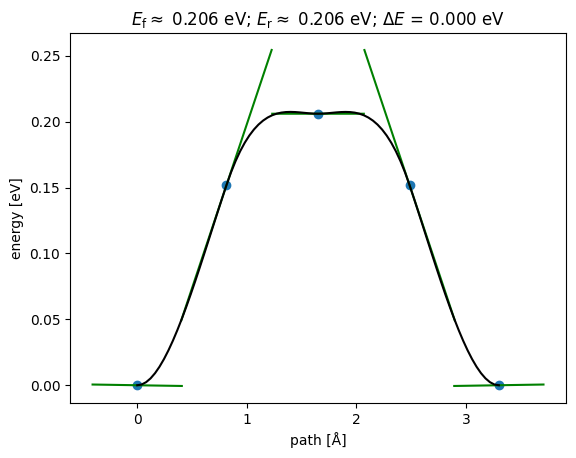

In [11]:
fname='neb.traj@-'+str(number_of_neb_images+2)+':'
images = read(fname)
nebtools = NEBTools(images)
Ef, dE = nebtools.get_barrier()
Ef, dE = nebtools.get_barrier(fit=False)
max_force = nebtools.get_fmax()
fig = nebtools.plot_band()
fig.savefig('atom_barrier.png')
view(images)